# Color Compression

**In this mini project we will be using kmeans clustering to do color compression, so that particular image can be rendered on other devices which doesn't support heavy usage of colors.**

### Data And Setup

In [1]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans
from PIL import Image as PImage
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np
import os
%matplotlib inline

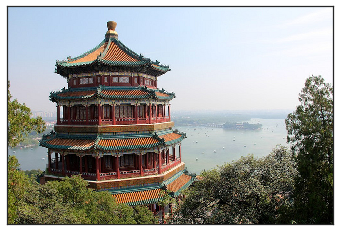

In [2]:
#Loading The Sample Image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

### Dimensions And Reshaping

In [3]:
#Shape Of The Image
china.shape

(427, 640, 3)

In [4]:
#The Above Output Means That There Are 427 Rows In The Input Data With 640 Values Each Of Array Size 3.
print(china[0][0])

[174 201 231]


In [5]:
#Lets Divide The Entire Array By 255, To Convert The Values To Lie B/W 0 And 1, So That This Array Can Be Used Later 
#As A Color Array To Plot Pixels.
china_data = china.reshape(427*640,3)/255
china_data.shape

(273280, 3)

### Plotting Image Pixels

In [6]:
#Lets Write A Function To Plot Image Pixels
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, axes = plt.subplots(1,3, figsize=(16,6))
    
    axes[0].scatter(R,G, color = colors, s=10)
    axes[0].set(xlabel='Red', ylabel='Green')

    axes[1].scatter(R, B, color=colors, s=10)
    axes[1].set(xlabel='Red', ylabel='Blue')
    
    axes[2].scatter(G, B, color=colors, s=10)
    axes[2].set(xlabel='Green', ylabel='Blue')
    
    plt.suptitle(title, size=20)        

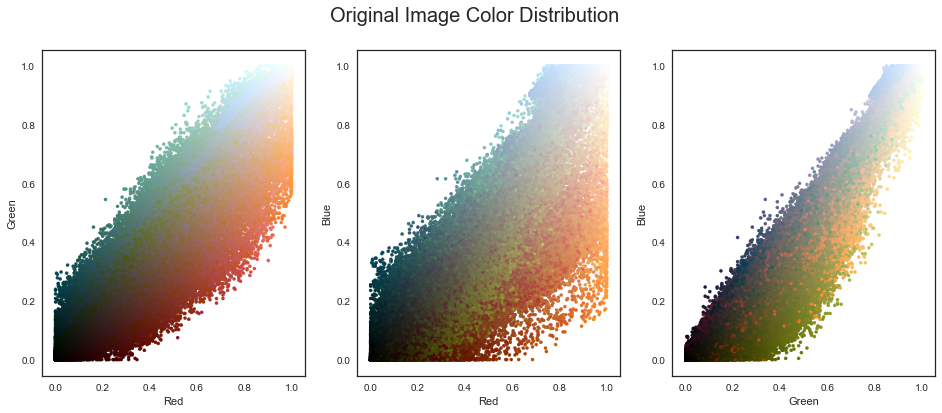

In [7]:
plot_pixels(china_data, title = "Original Image Color Distribution",N=200000)

### Creating Clusters

In [8]:
#Lets Write A Function That Returns Cluster Center For Each Data Point As New Color
def createClusters(n_clusters, data):
    kmeans = MiniBatchKMeans(n_clusters)
    pred = kmeans.fit_predict(data)
    return kmeans.cluster_centers_[pred] #New Pixels Will Be Centers Of Each Cluster

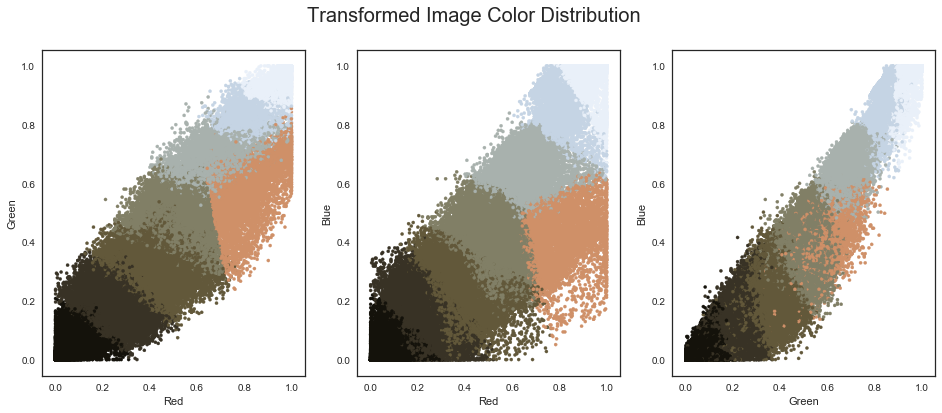

In [9]:
new_colors = createClusters(8,china_data)
plot_pixels(china_data, colors=new_colors, title="Transformed Image Color Distribution",N=200000)

### Color Compressed Image

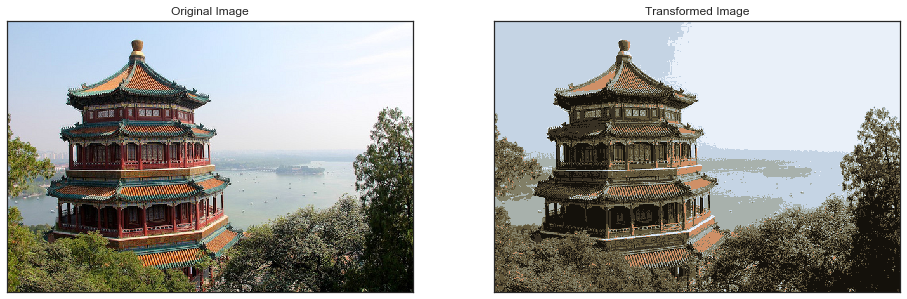

In [10]:
#Lets Write A Function To Plot Original And Transformed Image Side By Side
def plotOrginalAndTransformedImage(original, tranformed):
    fig, axes = plt.subplots(1,2, figsize=(16,6))
    axes[0].imshow(original)
    axes[0].set(title='Original Image', xticks=[], yticks=[])

    axes[1].imshow(tranformed)
    axes[1].set(title='Transformed Image', xticks=[], yticks=[])
    
china_recolored = new_colors.reshape(china.shape)
plotOrginalAndTransformedImage(china, china_recolored)

### Another Example

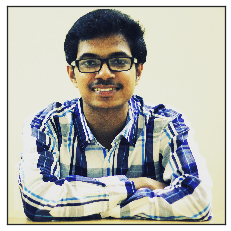

In [42]:
image = PImage.open(os.getcwd()+'\\16134890.JPG')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

In [43]:
image.size

(3204, 3204)

In [44]:
image_data = np.array(image.getdata())

In [45]:
image_data.shape

(10265616, 3)

In [46]:
print(image_data[0])

[232 233 219]


In [47]:
image_data = image_data/255
print(image_data[0])

[0.90980392 0.91372549 0.85882353]


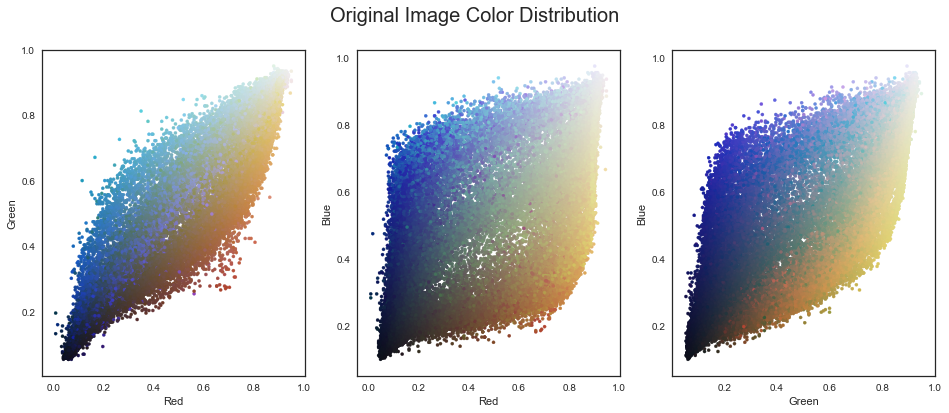

In [48]:
plot_pixels(image_data, title = "Original Image Color Distribution",N=100000)

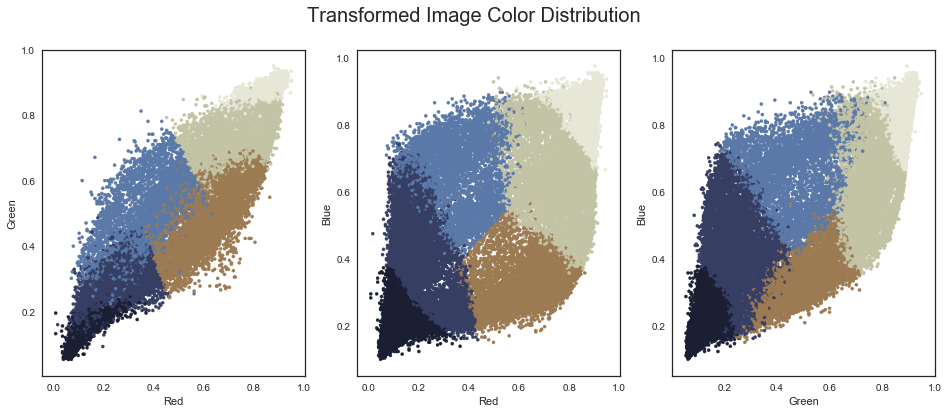

In [50]:
new_colors = createClusters(6, image_data)
plot_pixels(image_data, colors=new_colors, title="Transformed Image Color Distribution",N=100000)

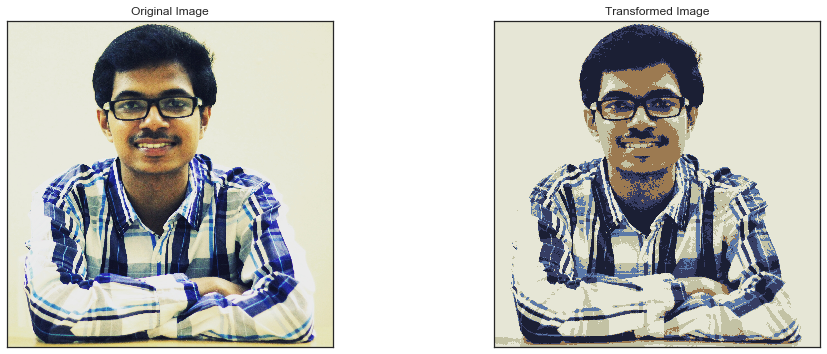

In [51]:
image_recolored = new_colors.reshape(image.size[0],image.size[0],3)
plotOrginalAndTransformedImage(image, image_recolored)